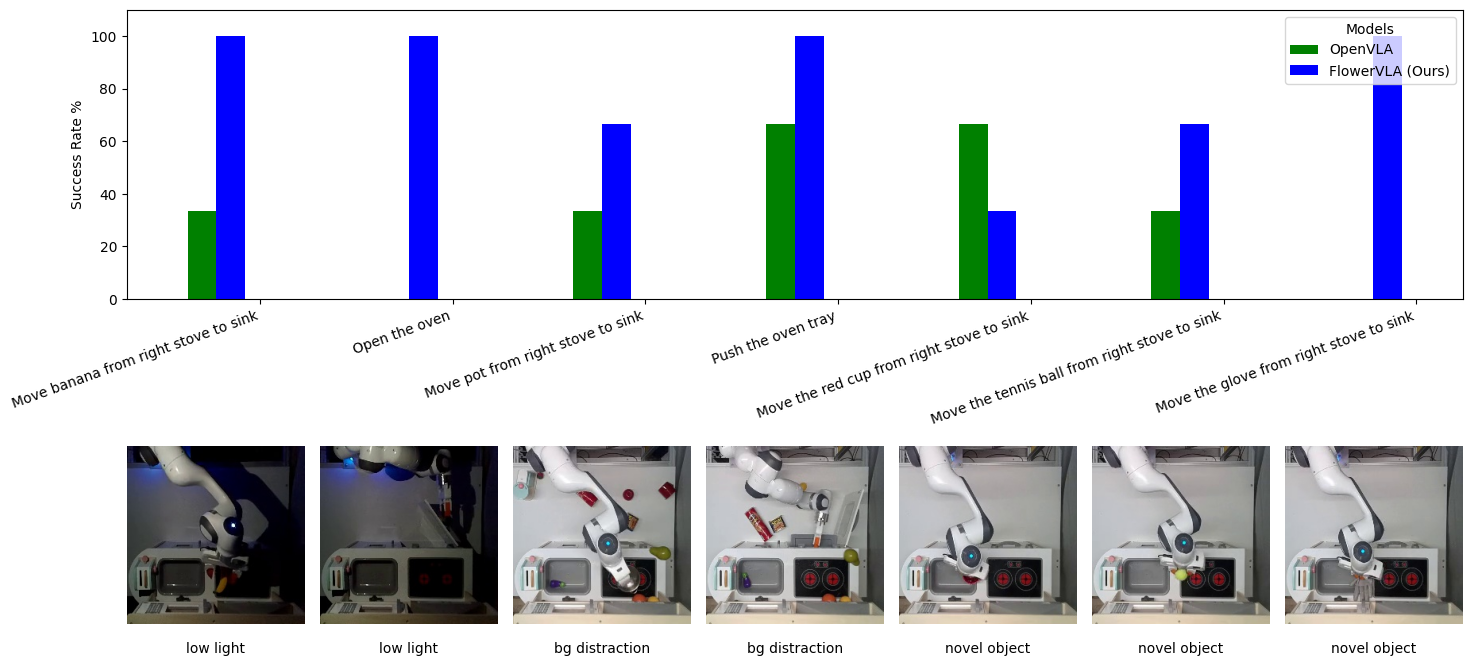

In [27]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.image as mpimg
from matplotlib.gridspec import GridSpec

# Define data for success rates
tasks = [
    'Move banana from right stove to sink', # with flashlight
    'Open the oven', # with flashlight
    'Move pot from right stove to sink', # with bg ditraction
    'Push the oven tray', # with bg ditraction
    'Move the red cup from right stove to sink', # novel object
    'Move the tennis ball from right stove to sink', # novel object
    'Move the glove from right stove to sink' # novel object
]

models = ["OpenVLA", "FlowerVLA (Ours)"]
colors = ["green", "blue"]

success_rates = np.array([
    [33.33, 100.0],
    [0.0, 100.0],
    [33.33, 66.67],
    [66.67, 100.0],
    [66.67, 33.33],
    [33.33, 66.67],
    [0.0, 100.0],
])

task_images = [
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/lowlight_flashlight_generalization_flower/banana_from_right_stove_to_sink/101/0/primary_camera_25pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/lowlight_flashlight_generalization_flower/open_oven/111/0/primary_camera_75pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/bg_distraction_generalization_openvla/pot_from_right_stove_to_sink/124/0/primary_camera_75pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/bg_distraction_generalization_flower/push_oven_tray/17/0/primary_camera_25pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_flower/Move the red cup from right stove to sink/124/0/primary_camera_50pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_flower/Move the tennis ball from right stove to sink/106/0/primary_camera_50pct.jpg',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_flower/Move the glove from right stove to sink/100/0/primary_camera_50pct.jpg'
]

task_descriptions = [
    "low light", "low light", "bg distraction", "bg distraction", "novel object", "novel object", "novel object"
]

# Plot settings
num_tasks = len(tasks)
bar_width = 0.15
x = np.arange(num_tasks)

# Create figure with GridSpec layout
fig = plt.figure(figsize=(15, 7))  # Adjusted height
gs = GridSpec(2, num_tasks, height_ratios=[1, 1])  # Removed separate row for text

# Top subplot: Bar chart
ax1 = fig.add_subplot(gs[0, :])
for i, (model, color) in enumerate(zip(models, colors)):
    ax1.bar(x + i * bar_width, success_rates[:, i], width=bar_width, label=model, color=color)

ax1.set_xticks(x + bar_width * 2)
ax1.set_xticklabels(tasks, rotation=20, ha="right")
ax1.set_ylabel("Success Rate %")
ax1.legend(title="Models")
ax1.set_ylim(0, 110)

# Bottom row: Task images with descriptions
for i, (img_path, desc) in enumerate(zip(task_images, task_descriptions)):
    ax_img = fig.add_subplot(gs[1, i])
    img = mpimg.imread(img_path)
    ax_img.imshow(img)
    ax_img.axis("off")
    ax_img.text(0.5, -0.1, desc, ha="center", va="top", fontsize=10, transform=ax_img.transAxes)

# Adjust layout and display
plt.tight_layout()
plt.show()


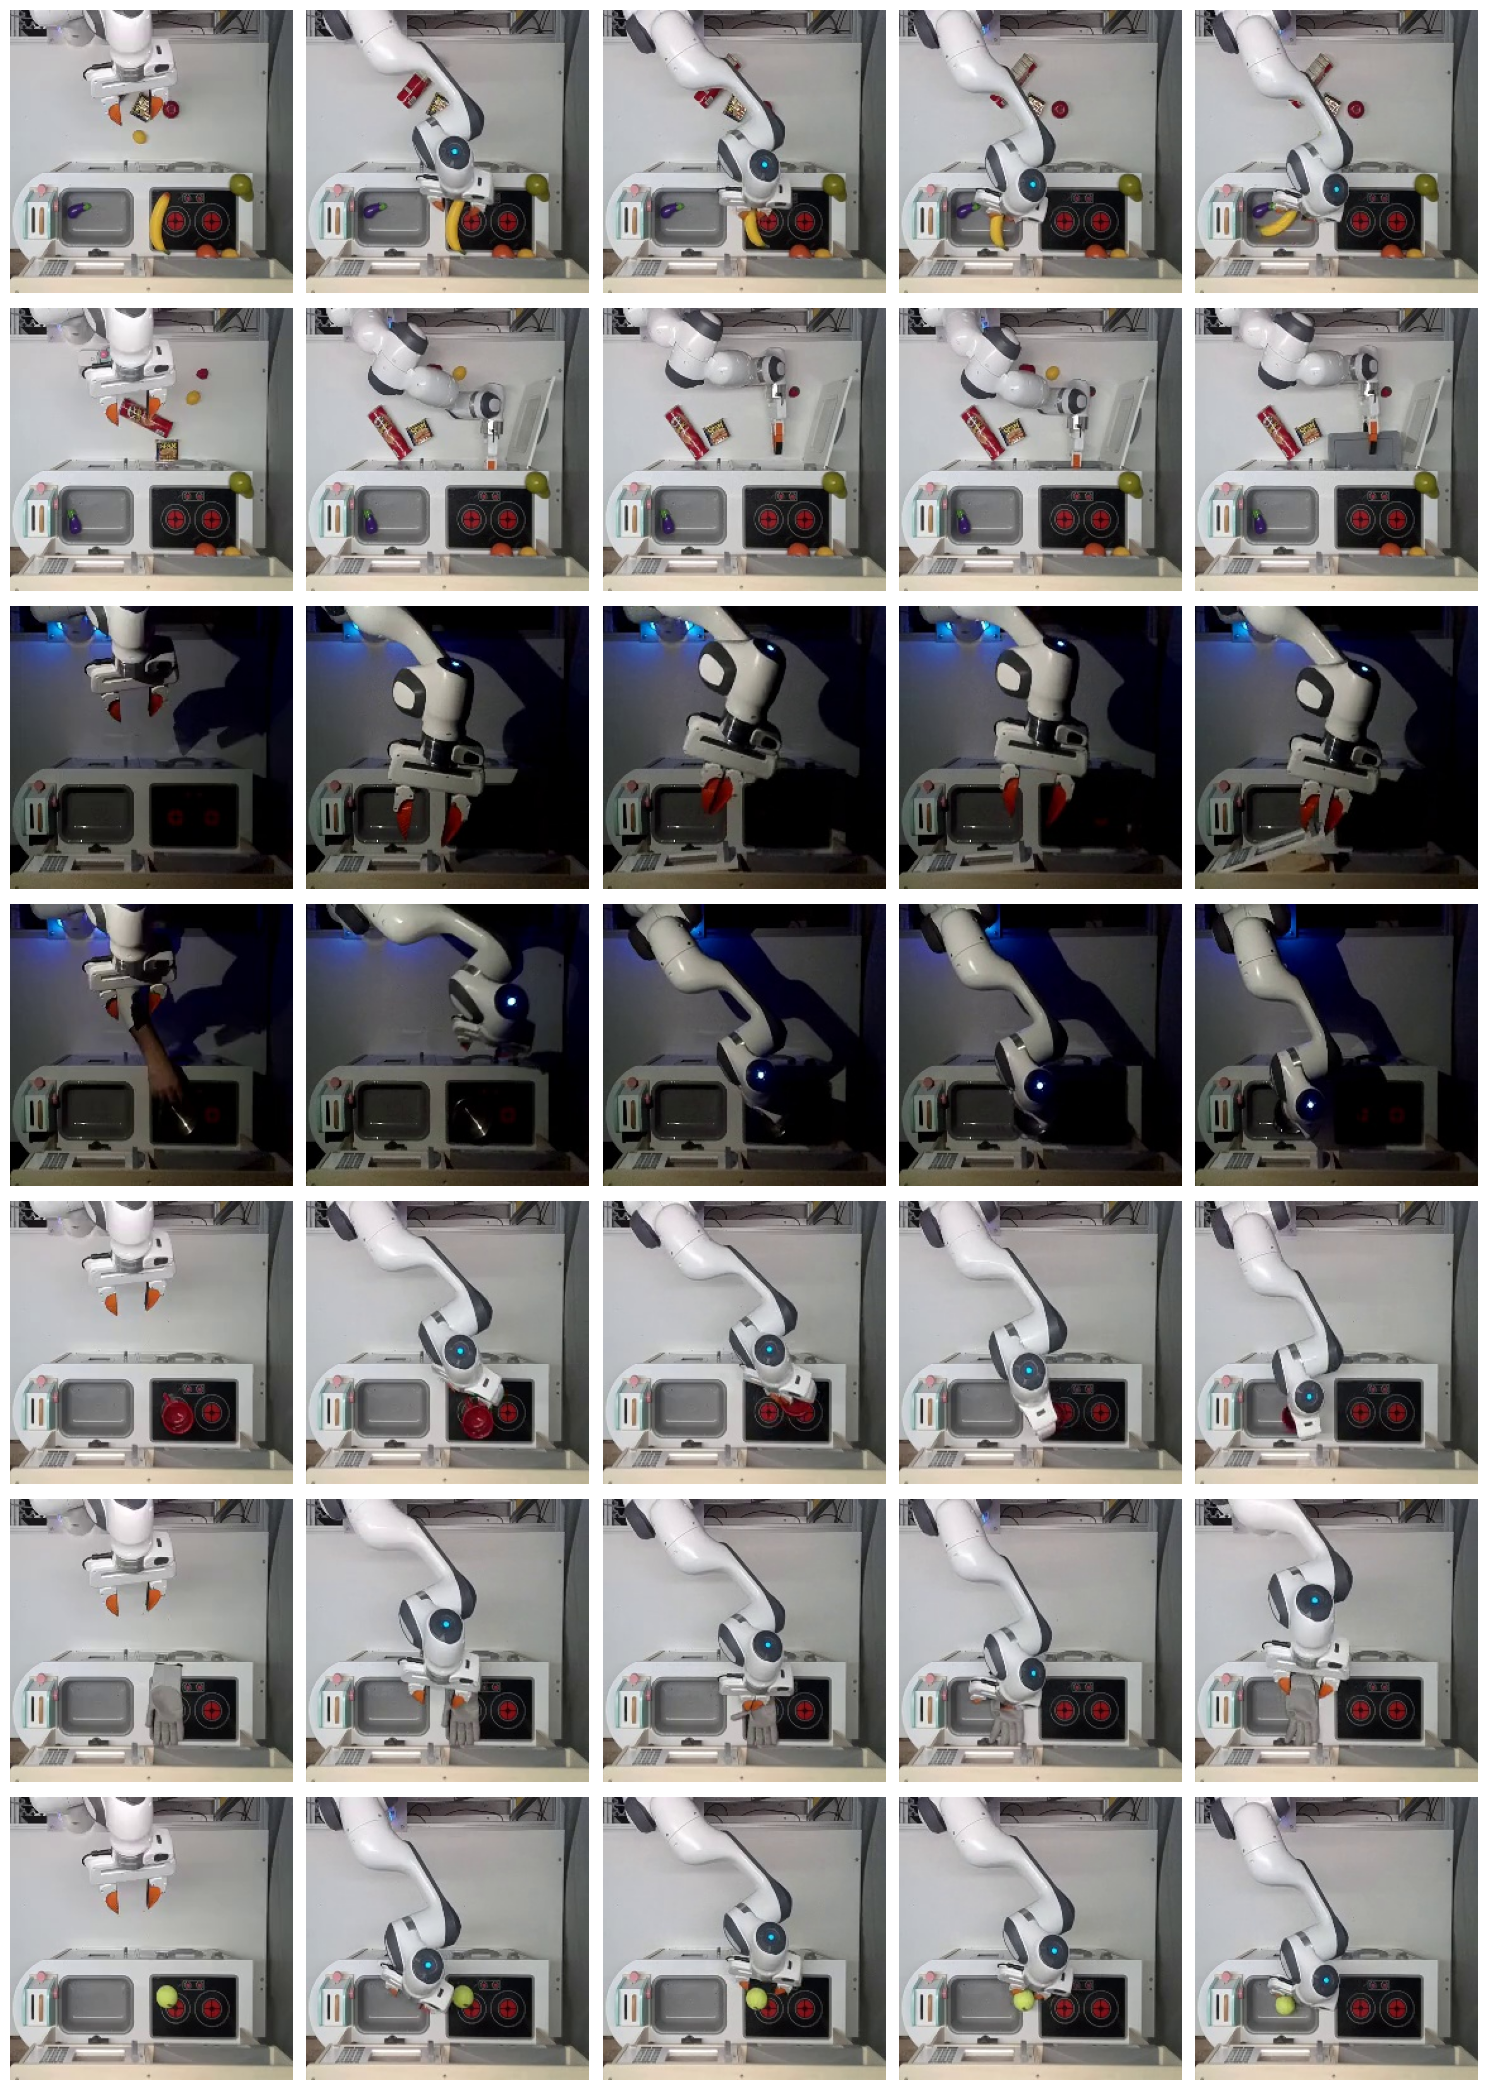

In [46]:
import os
import matplotlib.pyplot as plt
import cv2
from matplotlib.backends.backend_pdf import PdfPages

def load_image(image_path):
    """Load an image from the given path using OpenCV and convert to RGB."""
    img = cv2.imread(image_path)
    if img is None:
        return None
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

def plot_rollout_sequences(directories, output_path="rollout_figure.pdf"):
    """Generates and saves a figure showing rollout sequences from given directories."""
    sequence_images = ["first.jpg", "25pct.jpg", "50pct.jpg", "75pct.jpg", "last.jpg"]
    
    num_rollouts = len(directories)
    num_images_per_rollout = len(sequence_images)
    
    with PdfPages(output_path) as pdf:
        fig, axes = plt.subplots(num_rollouts, num_images_per_rollout, figsize=(num_images_per_rollout * 3, num_rollouts * 3))
        
        if num_rollouts == 1:
            axes = [axes]  # Ensure we can iterate correctly
        
        for row_idx, directory in enumerate(directories):
            for col_idx, img_name in enumerate(sequence_images):
                img_path = os.path.join(directory, f"primary_camera_{img_name}")
                img = load_image(img_path)
                
                if img is not None:
                    axes[row_idx][col_idx].imshow(img)
                
                axes[row_idx][col_idx].axis("off")
                # if row_idx == 0:
                #     axes[row_idx][col_idx].set_title(img_name.replace(".jpg", ""))
        
        plt.tight_layout()
        plt.savefig(output_path)
        plt.show()

# Example usage
directories = [
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/bg_distraction_generalization_flower/banana_from_right_stove_to_sink/0/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/bg_distraction_generalization_flower/pull_oven_tray/16/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/lowlight_flashlight_generalization_flower/open_microwave/104/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/lowlight_flashlight_generalization_flower/pot_from_right_stove_to_sink/123/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_openvla/Move the red cup from right stove to sink/107/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_flower/Move the glove from right stove to sink/102/0',
    '/home/irl-admin/Omer/flower_baselines/real_kitchen_evaluation/processed_/novel_object_generalization_flower/Move the tennis ball from right stove to sink/108/0'
]
plot_rollout_sequences(directories)
